In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys,os
import pandas as pd
path_to_utilsGRF_="../../../../repos/shared/utilsGRF" #GeneRegulatoryFunctions repo
sys.path.append(path_to_utilsGRF_)

from matplotlib.gridspec import GridSpec
import BoundaryFinder as BF
def plot_hillline(ax,nmin=1,nmax=1,colorl="gray",colordict=None,textonly=[],label=True):
    nrange=np.arange(1.4,nmax+0.2,0.05)
    hillline=np.vstack([BF.position_steepness_hill(n) for n in nrange])
    #fig,ax=plt.subplots(1,1,figsize=(5,5))
    if label:
        label="Hill line"
    else:
        label=None
    ax.plot(hillline[:,0],hillline[:,1],color=colorl,linestyle='-',label=label)
        
    for n in range(nmin,nmax):
        ph,sh=BF.position_steepness_hill(n)
        if colordict is None:
            color=colorl
        else:
            color=colordict[n]
        ax.scatter(ph,sh,color=colorl,marker="x",s=60)
        if n in textonly:
            ax.text(ph+0.02,sh-0.05,'%d'%n,color=color)
        
    #ax.legend()
    #ax.set_xlim(0.499,1.2)
    #ax.set_xlabel('position')
    #ax.set_ylabel('steepness')
    return ax

In [2]:
from matplotlib import rcParams
#rcParams.update({
#   'font.family':'sans-serif',
#    'font.sans-serif':['Liberation Sans'],
#    })
rcParams["font.size"]=14


In [3]:

foldernew="../boundaryanalysis_notebooks/ashapes"   


In [11]:
ashape=np.load(os.path.join(foldernew,"N4Pb1000_7_centreandul_stitched_cutp=0.28_2023_8_21.npy"))

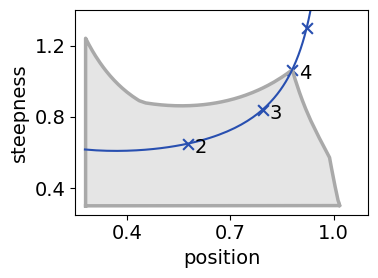

In [17]:
fig,ax=plt.subplots(1,1,figsize=(4,3))

ax.plot(ashape[0],ashape[1],color="darkgrey",linestyle="-",linewidth=2.5)
#ashape=alphashape.alphashape(list(zip(ashape[0],ashape[1])),alpha=3.55)
ax.fill(ashape[0],ashape[1],"gray",alpha=0.2)
nmax=6
colorhill="#284fb0"
ax=plot_hillline(ax,nmin=2,nmax=8,textonly=[2,3,4],colorl=colorhill,colordict={2:"k",3:"k",4:"k",5:"k",6:"k",7:"k"})
ax.set_xlim(0.25,1.1)
ax.set_xlabel("position")
ax.set_ylabel("steepness")
ax.set_xticks([0.4,0.7,1.0])
ax.set_yticks([0.4,0.8,1.2])
#ax.text(0.45,1.25,"hypercube "+r"$\mathcal{C}_{4+1}$",useTex=True,fontsize=18)
ax.set_ylim(0.25,1.4)


plt.tight_layout()
plt.savefig("../figs/Fig1B_extendedul.pdf",bbox_inches="tight")

plt.show()